In [125]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

In [126]:
val_cov = (
    "/Users/julia/Desktop/Masterarbeit/snakemake/data/cluster_results/cascade/covid_data/fmsan/results/results.sqlite3",
    "/Users/julia/Desktop/Masterarbeit/snakemake/data/cluster_results/cascade/covid_data/fmsan/plots/", 
    "Covid Data FMSAN"
)

val_354 = (
    "/Users/julia/Desktop/Masterarbeit/snakemake/data/cluster_results/ml/354//results/results.sqlite3", 
    "/Users/julia/Desktop/Masterarbeit/snakemake/data/cluster_results/ml/354/plots/",
    "354"
)

DB_PATH, PLOT_PATH, DATASET_NAME = val_cov

In [127]:
# convert sqlite database to pandas dataframe
con = sqlite3.connect(DB_PATH)

runs = pd.read_sql_query("SELECT * FROM run", con)
trees = pd.read_sql_query("SELECT * FROM tree", con)
eval_trees = pd.read_sql_query("SELECT * FROM evaltree", con)
rfdistances_tree = pd.read_sql_query("SELECT * FROM rfdistancetree", con)
rfdistances_eval_tree = pd.read_sql_query("SELECT * FROM rfdistanceevaltree", con)
runs

,id,num_raxml_pars_trees,num_raxml_rand_trees,blmin,blmax,average_absolute_rf_distance,average_relative_rf_distance,num_unique_topos,raxml_best_llh,iqtree_best_llh,raxml_best_eval_llh,raxml_treesearch_elapsed_time
0,1,10,0,1.000000e-02,100.0,7412.177778,0.761629,9,-121608.571191,-118442.733,-108277.352198,445173.090
1,2,10,0,1.000000e-03,100.0,7425.244444,0.762972,9,-114737.075617,-116154.211,-108262.142947,580551.432
2,3,10,0,1.000000e-04,100.0,7419.511111,0.762383,9,-113472.924985,-114887.389,-108247.628578,421022.794
3,4,10,0,1.000000e-05,100.0,7423.866667,0.762831,9,-109661.271728,-109660.945,-108259.433256,570303.659
4,5,10,0,1.000000e-06,100.0,7434.888889,0.763963,9,-108407.298838,-108407.552,-108257.830651,471364.157
5,6,10,0,1.000000e-07,100.0,7430.800000,0.763543,9,-108261.035834,-108261.040,-108245.955744,542439.358
6,7,10,0,1.000000e-08,100.0,7454.400000,0.765968,9,-108259.245189,-108259.274,-108257.750004,515878.823
7,8,10,0,1.000000e-09,100.0,7460.577778,0.766603,9,-108257.885145,-108257.914,-108257.749723,508684.050
8,9,10,0,1.000000e-10,100.0,7462.666667,0.766817,9,-108258.725567,-108258.754,-108258.726134,502842.109


In [128]:
df = runs.merge(trees, left_on="id", right_on="run_id", suffixes=("_run", "_tree"))
df = df.merge(eval_trees, left_on="id_tree", right_on="startTree_id", suffixes=("_tree", "_eval"))
df = df.loc[df.is_best_eval == True]
df = df[[
        "blmin", 
        "average_relative_rf_distance", 
        "raxml_best_llh", 
        "iqtree_best_llh", 
        "raxml_best_eval_llh", 
        "eval_blmin",
        "raxml_treesearch_elapsed_time_run", 
        "raxml_treesearch_elapsed_time"
    ]]

df["total_time"] = df["raxml_treesearch_elapsed_time_run"] + df["raxml_treesearch_elapsed_time"]


df.raxml_treesearch_elapsed_time_run = df.raxml_treesearch_elapsed_time_run.round().astype(int)
df.raxml_treesearch_elapsed_time = df.raxml_treesearch_elapsed_time.round().astype(int)
df.total_time = df.total_time.round().astype(int)

df = df.rename(columns={
        "average_relative_rf_distance":"avg_rf_dist", 
        "raxml_treesearch_elapsed_time_run": "treesearch_time", 
        "raxml_treesearch_elapsed_time": "eval_time", 
        "raxml_treesearch_time": "best_eval_tree_time"})

df

,blmin,avg_rf_dist,raxml_best_llh,iqtree_best_llh,raxml_best_eval_llh,eval_blmin,treesearch_time,eval_time,total_time
8,1.000000e-02,0.761629,-121608.571191,-118442.733,-108277.352198,1.000000e-10,445173,394,445567
17,1.000000e-03,0.762972,-114737.075617,-116154.211,-108262.142947,1.000000e-10,580551,659,581211
26,1.000000e-04,0.762383,-113472.924985,-114887.389,-108247.628578,1.000000e-10,421023,649,421672
35,1.000000e-05,0.762831,-109661.271728,-109660.945,-108259.433256,1.000000e-10,570304,626,570929
44,1.000000e-06,0.763963,-108407.298838,-108407.552,-108257.830651,1.000000e-10,471364,618,471982
53,1.000000e-07,0.763543,-108261.035834,-108261.040,-108245.955744,1.000000e-10,542439,608,543047
62,1.000000e-08,0.765968,-108259.245189,-108259.274,-108257.750004,1.000000e-10,515879,269,516148
71,1.000000e-09,0.766603,-108257.885145,-108257.914,-108257.749723,1.000000e-10,508684,615,509299
80,1.000000e-10,0.766817,-108258.725567,-108258.754,-108258.726134,1.000000e-10,502842,646,503488


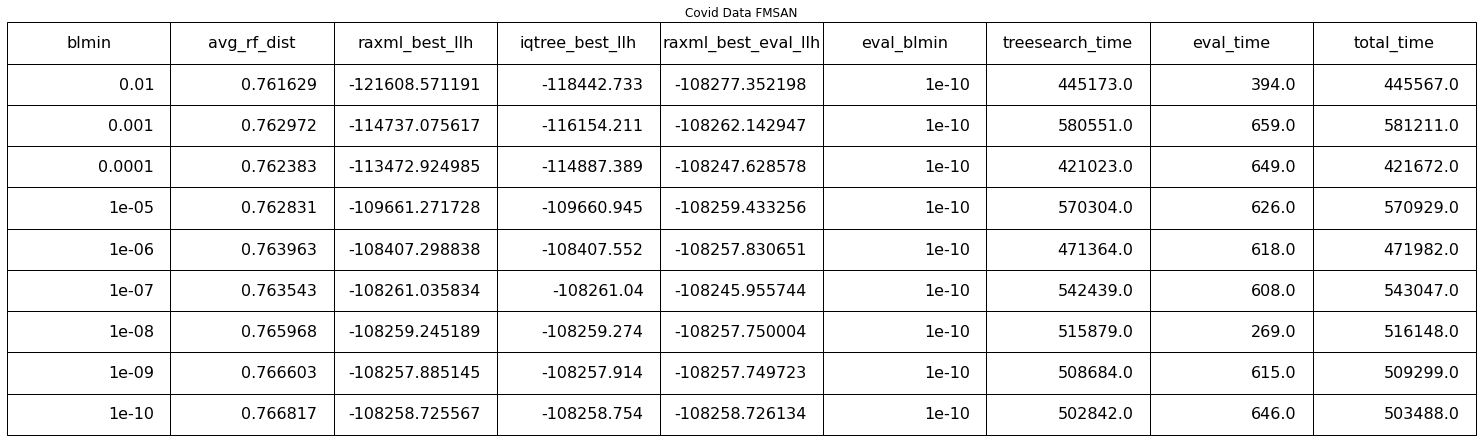

In [129]:
def dataset_summary_table(data, col_width=2.3, row_height=0.625, font_size=16, bbox=[0, 0, 1, 1]):
    size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
    fig, ax = plt.subplots(figsize=size)
    ax.set_title(DATASET_NAME)
    ax.axis('off')

    table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns)

    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    plt.tight_layout() 
    fig.savefig(PLOT_PATH + "dataset_summary_table.pdf", format="pdf")
    fig.savefig(PLOT_PATH + "dataset_summary_table.svg", format="svg")

dataset_summary_table(df)

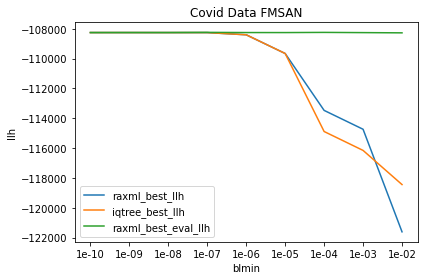

In [130]:
def plot_llhs():
    ax = plt.gca()
    ax.set_xlabel("blmin")    
    df.plot(kind="line", x="blmin", y="raxml_best_llh", ax=ax, logx=True, xticks=df["blmin"], xlabel="blmin", ylabel="llh", title=DATASET_NAME)
    df.plot(kind="line", x="blmin", y="iqtree_best_llh", ax=ax)
    df.plot(kind="line", x="blmin", y="raxml_best_eval_llh", ax=ax)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    
    plt.tight_layout() 
    fig = ax.get_figure()
    fig.savefig(PLOT_PATH + "llhs.pdf", format="pdf")
    fig.savefig(PLOT_PATH + "llhs.svg", format="svg")
   


plot_llhs()

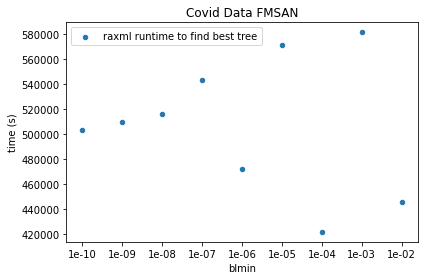

In [131]:
def plot_total_time():
    ax = plt.gca()
    ax.set_xlabel("blmin")
    df.plot(kind="scatter", x="blmin", y="total_time", ax=ax, label="raxml runtime to find best tree", logx=True, xticks=df["blmin"], xlabel="blmin", ylabel="time (s)")
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    plt.title(DATASET_NAME) 
    plt.tight_layout() 
    fig = ax.get_figure()
    fig.savefig(PLOT_PATH + "runtime.pdf", format="pdf")  
    fig.savefig(PLOT_PATH + "runtime.svg", format="svg")  

plot_total_time()

In [132]:
def get_blmin_for_eval_tree_id(eval_tree_id):
    eval_tree = eval_trees.loc[eval_trees.id == eval_tree_id]
    start_tree_id = eval_tree.startTree_id.item()
    start_tree = trees.loc[trees.id == start_tree_id]
    run_id = start_tree.run_id.item()
    run = runs.loc[runs.id == run_id]
    return run.blmin.item()

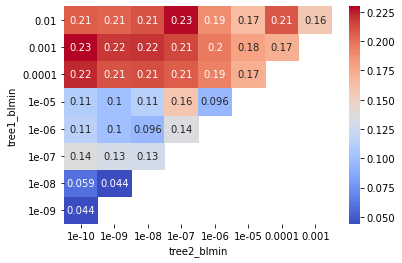

In [133]:

tree1_ids = []
tree2_ids = []
tree1_blmins = []
tree2_blmins = []
normalized_rf_distances = []
for idx, row in rfdistances_eval_tree.iterrows():
    tree1_ids.append(row.tree1_id)
    tree1_blmins.append(get_blmin_for_eval_tree_id(row.tree1_id))
    tree2_ids.append(row.tree2_id)
    tree2_blmins.append(get_blmin_for_eval_tree_id(row.tree2_id))
    normalized_rf_distances.append(row.normalized_rf_distance)

d = {
    "tree1_id": tree1_ids,
    "tree2_id": tree2_ids,
    "tree1_blmin": tree1_blmins,
    "tree2_blmin": tree2_blmins,
    "normalized_rf_distance": normalized_rf_distances,
}
df = pd.DataFrame(data=d)

data = df.pivot("tree1_blmin", "tree2_blmin", "normalized_rf_distance")

ax = plt.gca()
hmap = sns.heatmap(data, annot=True, cmap="coolwarm", ax=ax)
ax.invert_yaxis()

fig = ax.get_figure()

fig.savefig(PLOT_PATH + "rfdist_best_eval_trees.pdf", format="pdf", bbox_inches="tight") 
fig.savefig(PLOT_PATH + "rfdist_best_eval_trees.svg", format="svg", bbox_inches="tight") 

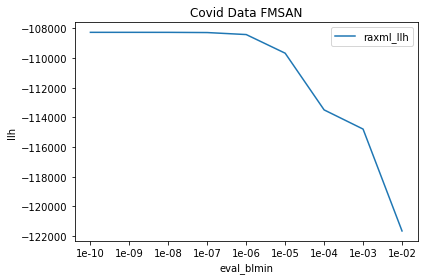

In [151]:
def plot_eval_llhs_for_varying_blmin(treesearch_blmin):
    r_id = runs.loc[runs.blmin == treesearch_blmin].id.item()
    best_tree_id = trees.loc[(trees.run_id == r_id) & (trees.is_best)].id.item()
    eval_t = eval_trees.loc[eval_trees.startTree_id == best_tree_id]
    eval_t = eval_t[["raxml_llh", "is_best", "eval_blmin"]]
    eval_t

    ax = plt.gca()
    ax.set_xlabel("eval_blmin")    
    eval_t.plot(kind="line", x="eval_blmin", y="raxml_llh", ax=ax, logx=True, xticks=eval_t["eval_blmin"], xlabel="eval_blmin", ylabel="llh", title=DATASET_NAME)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))

    plt.tight_layout() 
    fig = ax.get_figure()
    fig.savefig(PLOT_PATH + f"eval_llhs_for_start_blmin_{treesearch_blmin}.svg", format="svg")

plot_eval_llhs_for_varying_blmin(1e-10)